## Notebook del capítulo 5

In [1]:
# 22/5/24
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 1

In [2]:
# Datos
xn= np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])
yn= np.array([1.00, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])

Text(0, 0.5, '$v$ [m/s]')

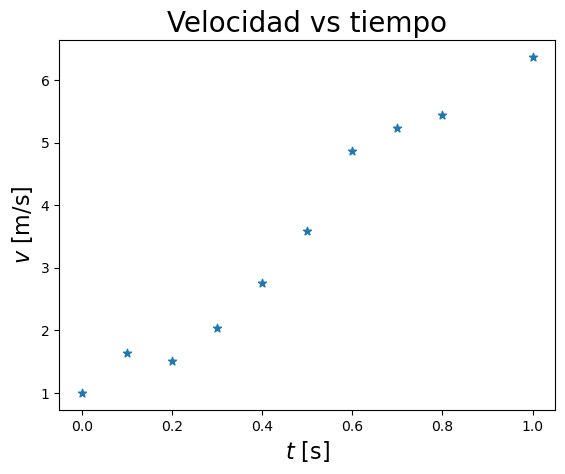

In [3]:
plt.scatter(xn, yn, marker='*') 
plt.title(r'Velocidad vs tiempo', fontsize=20) 
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)

In [4]:
# Se obtiene el valor de n (numero de datos)
n = len(xn)
# Las sumatorias necesarias 
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Sum_xSumy = np.sum(xn)*np.sum(yn)
Delta = n*np.sum(xn**2) - (np.sum(xn))**2
print(n,',', Sum_x, ',',Sum_y,',', Sum_xx,',', Sum_xy,',', Sum_xSumy, ',',Delta)

10 , 4.6 , 34.43 , 3.04 , 21.275 , 158.378 , 9.240000000000002


In [5]:
# Se escriben las ecuaciones para b y m 
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta
b_mc = Sum_y /n - m_mc * Sum_x/n
print('m=',m_mc, ',', 'b=',b_mc)

m= 5.884415584415585 , b= 0.7361688311688313


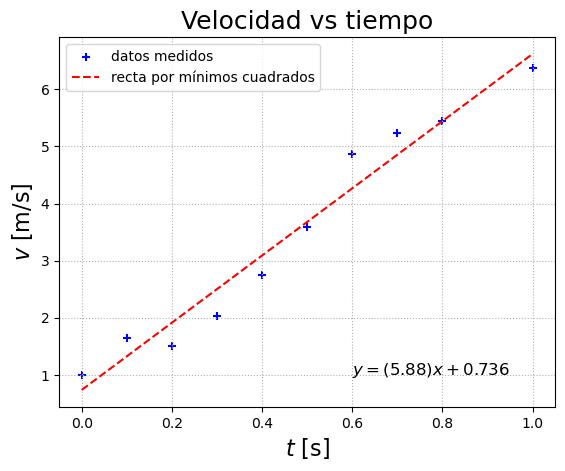

In [6]:
# La gráfica con los datos y la recta que mejor se ajusta 
y_pred= m_mc*xn + b_mc
# 
plt.figure()
plt.scatter(xn, yn, color='b',marker='+', label='datos medidos')
plt.plot(xn, y_pred, 'r--',label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title(r'Velocidad vs tiempo', fontsize=18)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.text(0.6, 1.0, '$y=(5.88) x + 0.736$', fontsize=12)
plt.show()

In [7]:
SSE= np.sum((yn -(b_mc + m_mc*xn))**2)
Sy= np.sqrt(SSE/(n-2))
print('n=',n,',','SSE=', SSE ,',', 'Sy=',Sy)

n= 10 , SSE= 1.244265584415585 , Sy= 0.3943769745458628


In [8]:
Delta_m = np.sqrt(n/(n*np.sum(xn ** 2) - np.sum(xn)**2))*Sy
Delta_b = np.sqrt(np.sum(xn**2)/(n*np.sum(xn**2)-np.sum(xn)**2))*Sy
print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Delta_m, 1)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Delta_b, 1)}')

m = 5.9 ± 0.4
b = 0.7 ± 0.2


In [9]:
# Ajustar la recta por mínimos cuadrados usando linalg.lstsq
A = np.vstack([xn, np.ones(len(xn))]).T
m_c, b_c = np.linalg.lstsq(A, yn, rcond=None)[0]
print(f'm = {np.round(m_c, 1)}' )
print(f'b = {np.round(b_c, 1)}' )

m = 5.9
b = 0.7


In [10]:
import statsmodels.api as sm

m = 5.8844 ± 0.4103
b = 0.7362 ± 0.2262


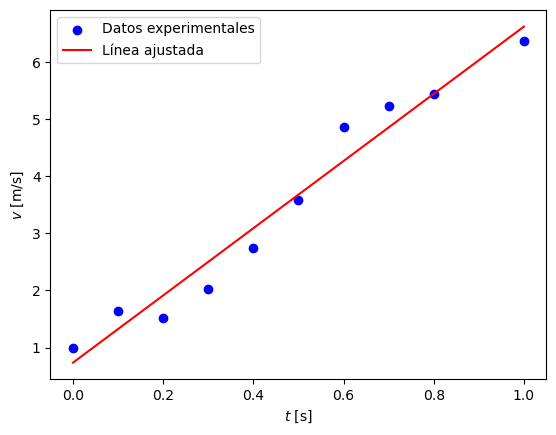

In [11]:
# Agregamos una constante (columna de unos) a xn
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.xlabel('$t$ [s]')
plt.ylabel('$v$ [m/s]')
plt.legend()
plt.show()

In [12]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           5.45e-07
Time:                        13:55:29   Log-Likelihood:                -3.7692
No. Observations:                  10   AIC:                             11.54
Df Residuals:                       8   BIC:                             12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7362      0.226      3.254      0.0

/Users/hector/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Ejemplo 2

In [13]:
# Datos de cizallamiento y edad de la pega
yn = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
               1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
               2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
               2053.50, 2414.40, 2200.50, 2654.20, 1753.70,2665.86])
xn = np.array([150.50, 230.75, 80.00, 170.00, 50.50, 190.00, 240.00, 20.50,
               70.50, 110.00, 130.00, 30.75, 250.00, 90.75, 220.00, 180.00,
               60.00, 120.50, 20.00, 210.50,0.00])

In [14]:
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7234 ± 0.2695
b = 2622.2834 ± 39.7582


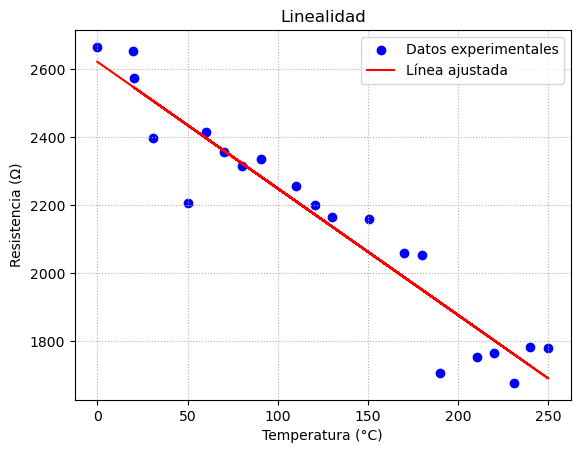

In [79]:
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title('Linealidad')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia (Ω)')
plt.legend()
plt.show()

In [16]:
y_pred = m * xn + b
y_pred

array([2061.90678577, 1763.10128967, 2324.40881038, 1989.29984279,
       2434.25008309, 1914.83118333, 1728.65953467, 2545.95307228,
       2359.78142362, 2212.70582118, 2138.23716172, 2507.78788431,
       1691.42520494, 2284.38190591, 1803.12819413, 1952.06551306,
       2398.87746984, 2173.60977496, 2547.81478877, 1838.50080738,
       2622.28344823])

In [17]:
Sum_y = np.sum(yn)
Sum_y 

45293.009999999995

In [18]:
Sum_yp = np.sum(y_pred)
Sum_yp

45293.01

In [19]:
e_i=yn-y_pred
e_i

array([  96.79321423,  -84.95128967,   -8.40881038,   72.00015721,
       -226.75008309, -206.53118333,   56.04046533,   29.04692772,
         -1.88142362,   43.99417882,   26.96283828, -108.23788431,
         88.37479506,   52.36809409,  -37.82819413,  101.43448694,
         15.52253016,   26.89022504,  106.38521123,  -84.80080738,
         43.57655177])

In [20]:
np.sum(e_i)

-4.547473508864641e-13

In [21]:
# Los promedios de x y y 
xp= np.sum(xn)/len(xn) 
yp= np.sum(yn)/len(xn)
print(xp,',', yp,',', m * xp + b)

125.01190476190476 , 2156.81 , 2156.81


In [22]:
Sx2 = np.sum((xn-xp)**2)/n
Sy2 = np.sum((yn-yp)**2)/n
Sxy=np.sum((xn-xp)*(yn-yp))/n
m=Sxy/Sx2 
b=yp-m*xp
Sx2 , Sy2, Sxy, m, b

(12896.068452380954,
 196582.60989999998,
 -48017.6465,
 -3.7234329731814255,
 2622.283448230692)

In [23]:
r=Sxy/(np.sqrt(Sx2)*np.sqrt(Sy2))
r, r**2

(-0.9536733725716963, 0.9094929015522734)

In [24]:
myx=r*np.sqrt(Sy2)/np.sqrt(Sx2)
mxy=r*np.sqrt(Sx2)/np.sqrt(Sy2)
myx,mxy

(-3.723432973181425, -0.24426192390276125)

In [25]:
SSR= np.sum(((m*xn + b)-yp)**2)
SSE= np.sum((yn-(m*xn + b))**2)
SST= np.sum((yn-yp)**2)
SSR,SSE,SST, SSR+SSE

(1787904.8827266963, 177921.2162733029, 1965826.099, 1965826.0989999992)

In [26]:
SSR = np.sum((model.predict() - np.mean(yn))**2)
SSE = np.sum((yn - model.predict())**2)
SSR,SSE

(1787904.8827266954, 177921.21627330303)

In [27]:
sig2=SSE/(len(xn)-2)
Db=np.sqrt(sig2*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))
Dm=np.sqrt(sig2/(np.sum((xn-xp)**2)) )
sig2, Dm, Db

(9364.274540700158, 0.26946874768576357, 39.75824977683072)

In [28]:
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7234 ± 0.2695
b = 2622.2834 ± 39.7582


In [29]:
tm=m/Dm
tb=b/Db
tm, tb

(-13.817680176862083, 65.95570637414825)

In [30]:
m-2.093*Dm, m+2.093*Dm

(-4.2874310620877285, -3.1594348842751225)

In [31]:
b-2.093*Db, b+2.093*Db

(2539.0694314477855, 2705.4974650135987)

In [32]:
# Calcular MSR y MSE
k=2
MSR = SSR / (k-1)
MSE = SSE / (len(xn)  - k)
# Calcular el estadístico F
F_manual = MSR / MSE
F_manual

190.92828547004726

In [33]:
MSR,MSE

(1787904.8827266954, 9364.274540700158)

In [34]:
np.sum(xn*e_i)

-3.310560714453459e-10

In [35]:
np.sum(y_pred*e_i)

1.6007106751203537e-10

In [36]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.31e-11
Time:                        13:55:30   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

In [37]:
SS_T=np.sum(yn**2)-len(xn)*yp**2
SS_T

1965826.098999992

In [38]:
SS_R= SS_T - m*np.sum(yn*(xn-xp))
SS_R

177921.2162732957

In [39]:
s=SS_R/(len(xn)-2)
s

9364.274540699773

In [40]:
np.sqrt(np.sum(e_i**2)/(len(xn)-2))

96.76918177136851

In [41]:
np.sqrt(s*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))

39.7582497768299

In [42]:
np.sqrt(s/(np.sum((xn-xp)**2)) )

0.269468747685758

In [43]:
xp**2

15627.976332199545

In [44]:
np.sum((xn-xp)**2)

128960.68452380954

In [45]:
from scipy import stats
# Sumas necesarias
n = len(xn)
sum_x = np.sum(xn)
sum_y = np.sum(yn)
sum_x2 = np.sum(xn**2)
sum_xy = np.sum(xn * yn)

# Calcular m y b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Predicciones
y_hat = m * xn + b

# Calcular SS_res y SS_tot
SS_res = np.sum((yn - y_hat)**2)
SS_tot = np.sum((yn - np.mean(yn))**2)

# Calcular R^2
R2 = 1 - (SS_res / SS_tot)

# Error estándar de los residuos
s = np.sqrt(SS_res / (n - 2))

# Varianza de los parámetros
sigma_m2 = np.sqrt(s**2 / np.sum((xn - np.mean(xn))**2))
sigma_b2 = np.sqrt(s**2 * (1/n + np.mean(xn)**2 / np.sum((xn - np.mean(xn))**2)))

# Estadísticos t
t_m = m / np.sqrt(sigma_m2)
t_b = b / np.sqrt(sigma_b2)

# Valores p
p_m = 2 * (1 - stats.t.cdf(np.abs(t_m), df=n-2))
p_b = 2 * (1 - stats.t.cdf(np.abs(t_b), df=n-2))

# Resultados
print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Coeficiente de determinación (R^2): {R2}")
print(f"Error estándar de los residuos: {s}")
print(f"Varianza de m: {sigma_m2}")
print(f"Varianza de b: {sigma_b2}")
print(f"t-m: {t_m}, p-m: {p_m}")
print(f"t-b: {t_b}, p-b: {p_b}")

Pendiente (m): -3.7234329731814206
Intercepto (b): 2622.2834482306916
Coeficiente de determinación (R^2): 0.9094929015522735
Error estándar de los residuos: 96.76918177136854
Varianza de m: 0.2694687476857636
Varianza de b: 39.75824977683073
t-m: -7.172810187325711, p-m: 8.148548074071726e-07
t-b: 415.87805561401336, p-b: 0.0


###  Ley de Enfriamiento

Pendiente: -3.7234329731814264
Intersección: 2622.2834482306926
Coeficiente de determinación R^2: 0.9094929015522738
Valor p: 2.3115343196844267e-11
Error estándar: 0.2694687476857632


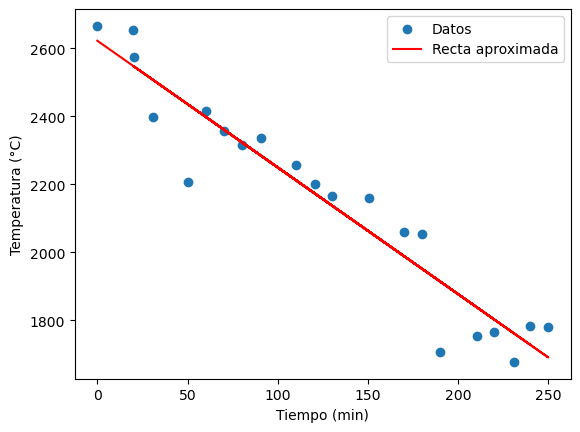

In [46]:
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Recta aproximada')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
#plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Pendiente: -3.7234329731814264
Intersección: 2622.2834482306926
Coeficiente de determinación R^2: 0.9094929015522738
Valor p: 2.3115343196844267e-11
Error estándar: 0.2694687476857632


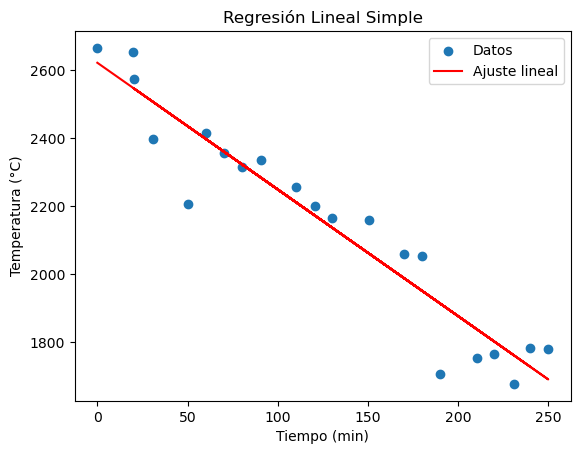

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos inventados

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Ajuste lineal')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Temperatura ambiente (T_env): -331656.50522553275
Temperatura inicial (T_0): 2622.491587129016
Constante (k): 1.1154325009984942e-05


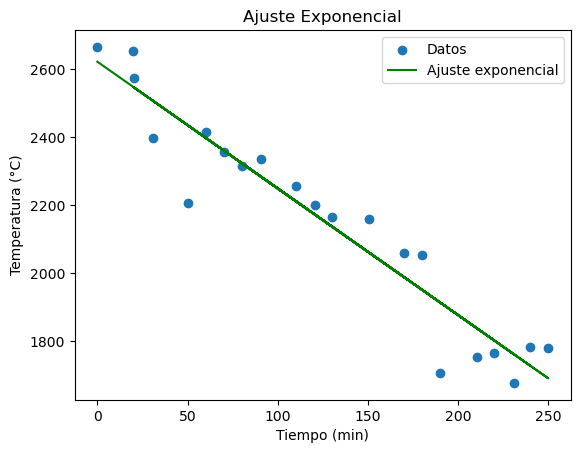

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
try:
    params, covariance = curve_fit(
        exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
    )
    T_env, T_0, k = params

    # Mostrar resultados
    print(f'Temperatura ambiente (T_env): {T_env}')
    print(f'Temperatura inicial (T_0): {T_0}')
    print(f'Constante (k): {k}')

    # Graficar resultados
    plt.scatter(xn, yn, label='Datos')
    plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Ajuste Exponencial')
    plt.legend()
    plt.show()
except RuntimeError as e:
    print(f"No se pudieron encontrar los parámetros óptimos: {e}")




Temperatura ambiente (T_env): -331656.50522553275
Temperatura inicial (T_0): 2622.491587129016
Constante (k): 1.1154325009984942e-05


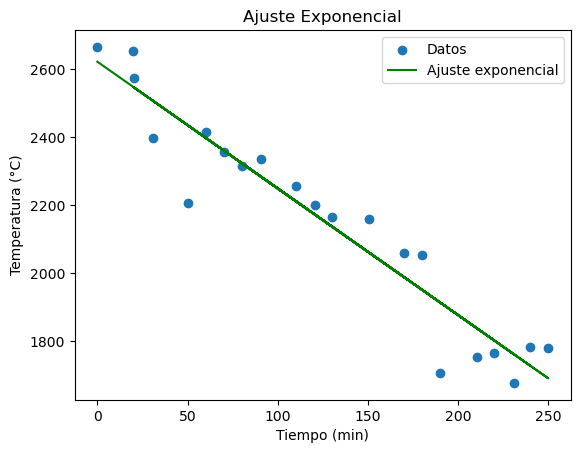

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos inventados

# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
params, covariance = curve_fit(
    exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
)
T_env, T_0, k = params

# Mostrar resultados
print(f'Temperatura ambiente (T_env): {T_env}')
print(f'Temperatura inicial (T_0): {T_0}')
print(f'Constante (k): {k}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial')
plt.legend()
plt.show()


In [50]:
import numpy as np
from scipy.stats import linregress

# Datos

# Ajuste del modelo de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Predicciones del modelo
yn_pred = intercept + slope * xn

# Cálculo de las sumas de cuadrados
y_mean = np.mean(yn)
SSR = np.sum((yn_pred - y_mean)**2)
SSE = np.sum((yn - yn_pred)**2)

# Número de coeficientes (k = 2: intercepto y pendiente)
k = 2

# Número total de observaciones
n = len(yn)

# Cálculo del estadístico F
MSR = SSR / k
MSE = SSE / (n - k - 1)
F_statistic = MSR / MSE

# Mostrar los resultados
print(f"Estadístico F: {F_statistic:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F: 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [51]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Obtener el valor del estadístico F del resumen
F_statistic = model.fvalue

# Número de coeficientes (k = 2: intercepto y pendiente)
k = 2

# Número total de observaciones
n = len(yn)

# Calcular las sumas de cuadrados
SSR = np.sum((model.predict() - np.mean(yn))**2)
SSE = np.sum((yn - model.predict())**2)

# Calcular MSR y MSE
MSR = SSR / k
MSE = SSE / (n - k - 1)

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (del resumen): {F_statistic:.4f}")
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F (del resumen): 190.9283
Estadístico F (manual): 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [52]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Obtener los parámetros del modelo
beta0, beta1 = model.params

# Número de observaciones (n) y número de coeficientes (k)
n = len(yn)
k = X.shape[1]

# Calcular las sumas de cuadrados (SSR y SSE)
SSR = np.sum((model.predict() - np.mean(yn))**2)
SSE = np.sum((yn - model.predict())**2)

# Calcular MSR y MSE
MSR = SSR / k
MSE = SSE / (n - k - 1)

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")


Estadístico F (manual): 90.4397
SSR: 1787904.88
SSE: 177921.22
MSR: 893952.44
MSE: 9884.51
Número de observaciones (n): 21
Número de coeficientes (k): 2


In [53]:
import numpy as np
import statsmodels.api as sm

# Datos


# Añadir columna de unos para el término constante
X = sm.add_constant(xn)

# Ajuste del modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Predicciones del modelo
y_pred = model.predict(X)

# Calcular SSR y SSE
y_mean = np.mean(yn)
SSR = np.sum((y_pred - y_mean) ** 2)
SSE = np.sum((yn - y_pred) ** 2)

# Grados de libertad
n = len(yn)
k = X.shape[1]
df_reg = k - 1
df_res = n - k

# Calcular MSR y MSE
MSR = SSR / df_reg
MSE = SSE / df_res

# Calcular el estadístico F
F_manual = MSR / MSE

# Mostrar resultados
print(f"Estadístico F (manual): {F_manual:.4f}")
print(f"SSR: {SSR:.2f}")
print(f"SSE: {SSE:.2f}")
print(f"MSR: {MSR:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"Número de observaciones (n): {n}")
print(f"Número de coeficientes (k): {k}")
print(f"Grados de libertad para la regresión (df_reg): {df_reg}")
print(f"Grados de libertad para el residuo (df_res): {df_res}")


Estadístico F (manual): 190.9283
SSR: 1787904.88
SSE: 177921.22
MSR: 1787904.88
MSE: 9364.27
Número de observaciones (n): 21
Número de coeficientes (k): 2
Grados de libertad para la regresión (df_reg): 1
Grados de libertad para el residuo (df_res): 19


In [54]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

# Datos


# Ajustar el modelo de regresión
X = sm.add_constant(xn)
model = sm.OLS(yn, X).fit()

# Obtener los coeficientes
intercept, slope = model.params

# Obtener los errores estándar
stderr_intercept, stderr_slope = model.bse

# Nivel de confianza (95%)
confidence_level = 0.95
alpha = 1 - confidence_level
n = len(yn)  # número de observaciones
p = 2  # número de parámetros (intersección y pendiente)
dof = n - p  # grados de libertad

# Obtener el valor crítico de t
t_critical = t.ppf(1 - alpha/2, dof)

# Calcular el intervalo de confianza
ci_intercept = (intercept - t_critical * stderr_intercept, intercept + t_critical * stderr_intercept)
ci_slope = (slope - t_critical * stderr_slope, slope + t_critical * stderr_slope)

ci_intercept, ci_slope


((2539.0684750866135, 2705.4984213747707),
 (-4.2874375439989985, -3.15942840236385))

In [55]:
import numpy as np
import statsmodels.api as sm

# Datos


# Ajustar el modelo de regresión
X = sm.add_constant(xn)
model = sm.OLS(yn, X).fit()

# Obtener los coeficientes
intercept, slope = model.params

# Obtener los errores estándar
stderr_intercept, stderr_slope = model.bse

# Mostrar resultados
intercept, slope, stderr_intercept, stderr_slope

# Valor crítico de t
t_critical = 2.093

# Calcular el intervalo de confianza para la intersección
ci_intercept_manual = (intercept - t_critical * stderr_intercept, intercept + t_critical * stderr_intercept)

# Calcular el intervalo de confianza para la pendiente
ci_slope_manual = (slope - t_critical * stderr_slope, slope + t_critical * stderr_slope)

ci_intercept_manual, ci_slope_manual

print(f"Intervalo de confianza para el intercepto: {ci_intercept_manual}")
print(f"Intervalo de confianza para la pendiente: {ci_slope_manual}")



Intervalo de confianza para el intercepto: (2539.0694314477855, 2705.4974650135987)
Intervalo de confianza para la pendiente: (-4.287431062087728, -3.1594348842751208)


In [56]:
import scipy.stats as stats

# Valores
F_statistic = 190.9
df_modelo = 1
df_error = 19

# Calcular el p-valor
p_value = 1 - stats.f.cdf(F_statistic, df_modelo, df_error)
p_value


2.3145041438965563e-11

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.31e-11
Time:                        15:31:44   Log-Likelihood:                -124.77
No. Observations:                  21   AIC:                             253.5
Df Residuals:                      19   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2622.2834     39.758     65.956      0.0

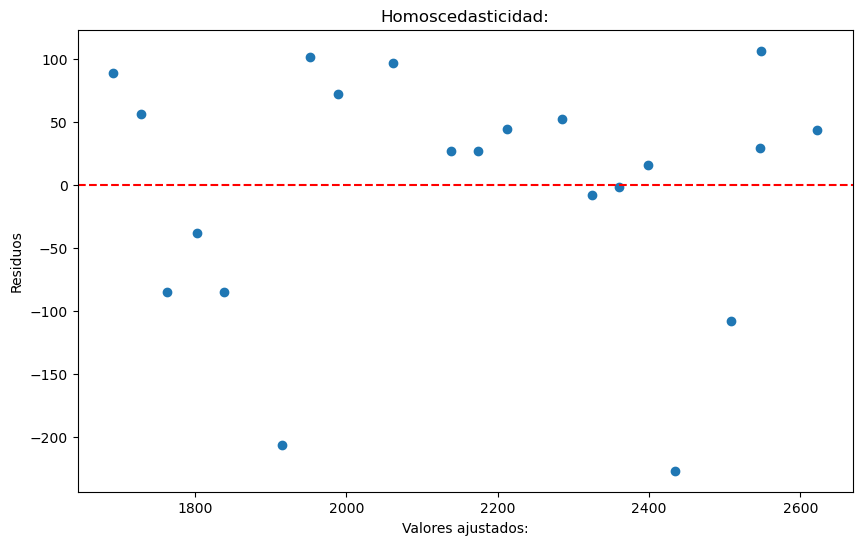

/Users/hector/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


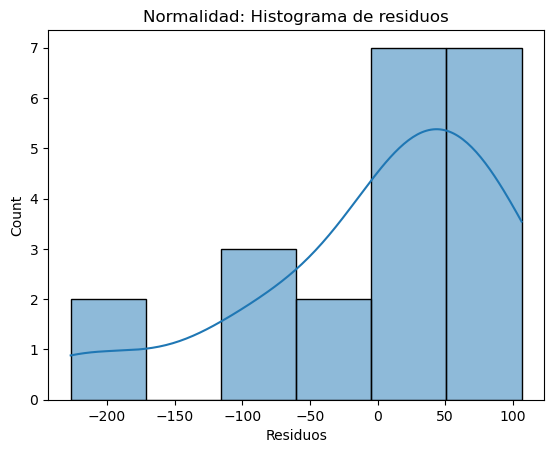

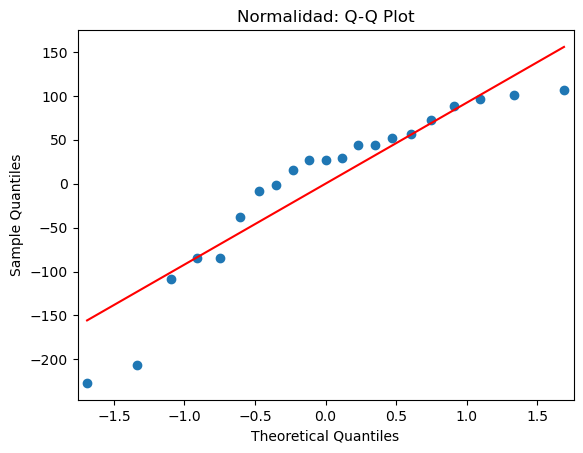

Estadístico de Durbin-Watson: 2.03


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns

# Datos de ejemplo


# Agregar constante para el intercepto
X = sm.add_constant(xn)

# Ajustar modelo
model = sm.OLS(yn, X).fit()

# Resumen del modelo
print(model.summary())

# Gráficos de Diagnóstico

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados:')
plt.ylabel('Residuos')
plt.title('Homoscedasticidad:')
plt.show()

# Histograma de residuos
#plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel('Residuos')
plt.title('Normalidad: Histograma de residuos')
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Normalidad: Q-Q Plot')
plt.show()

# Prueba de Durbin-Watson
dw_stat = durbin_watson(model.resid)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')


In [58]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Agregar constante para el intercepto
X = sm.add_constant(xn)

# Ajustar el modelo
model = sm.OLS(yn, X).fit()

# Calcular el estadístico de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')


Estadístico de Durbin-Watson: 2.03


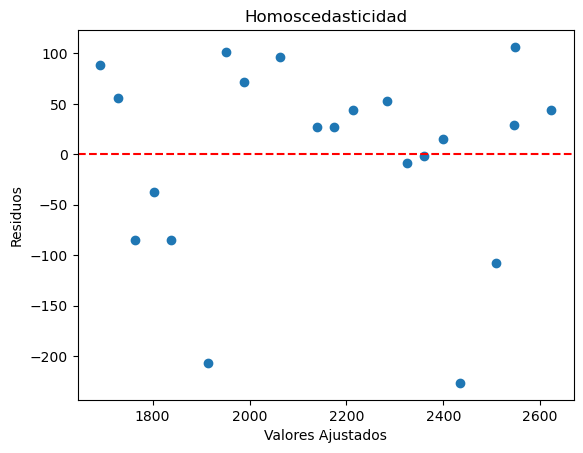

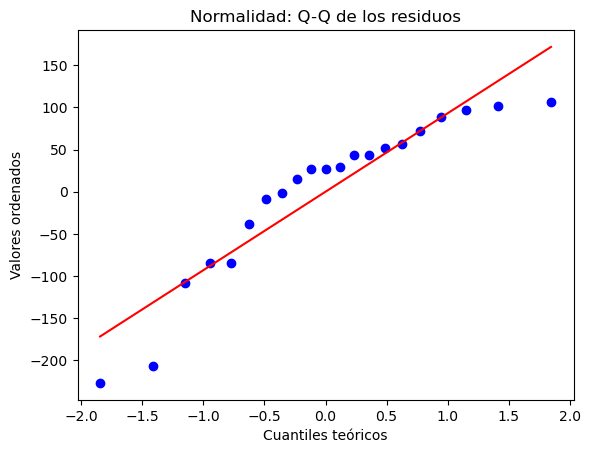

Estadístico de Shapiro-Wilk: 0.875, p-valor: 0.012


In [74]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Graficar residuos vs. valores ajustados
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homoscedasticidad')
plt.show()

# Graficar Q-Q plot para verificar normalidad
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
#sm.qqplot(residuals, line='45')
plt.title('Normalidad: Q-Q de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Valores ordenados')
plt.show()

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {shapiro_test[0]:.3f}, p-valor: {shapiro_test[1]:.3f}')


In [60]:
import numpy as np

def durbin_watson(residuals):
    diff_resid = np.diff(residuals)
    dw_stat = np.sum(diff_resid**2) / np.sum(residuals**2)
    return dw_stat

# Ejemplo de uso
# Supongamos que tienes un modelo de regresión y sus residuos se almacenan en la variable 'residuals'

residuals = model.resid # Este es un ejemplo de residuos
dw_statistic = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_statistic:.3f}')


Estadístico de Durbin-Watson: 2.027


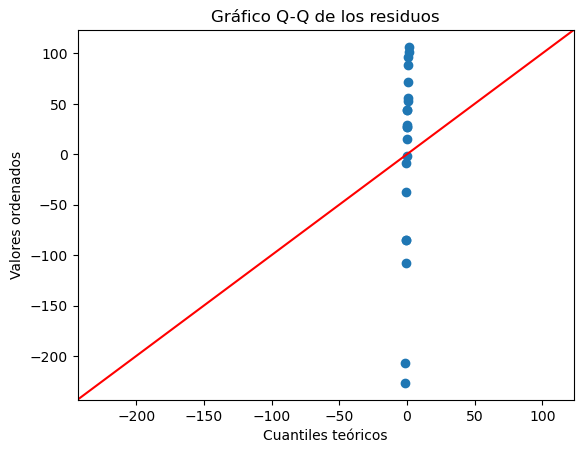

In [65]:
X = sm.add_constant(xn)

# Ajustar el modelo de regresión lineal
model = sm.OLS(yn, X).fit()

# Calcular los residuos
residuals = model.resid

# Crear el gráfico Q-Q
sm.qqplot(residuals, line='45')
plt.title('Gráfico Q-Q de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Valores ordenados')
plt.show()


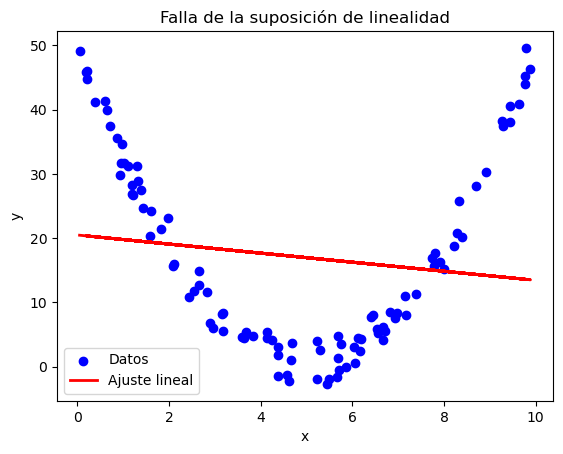

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos no lineales (relación cuadrática)
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 * (x - 5)**2 + np.random.randn(100, 1) * 2

# Ajustar un modelo de regresión lineal a estos datos no lineales
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', linewidth=2, label='Ajuste lineal')
plt.title('Falla de la suposición de linealidad')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


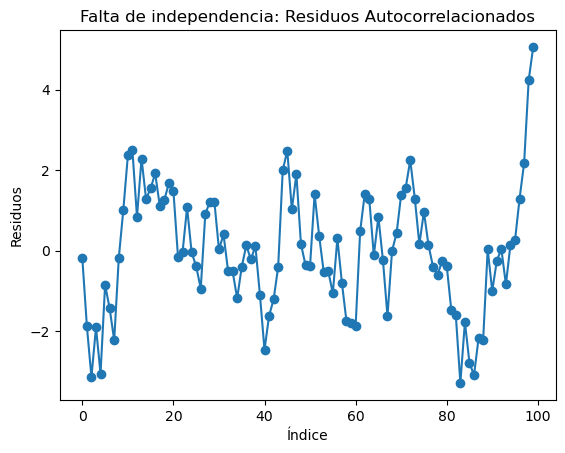

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir autocorrelación en los errores
rho = 0.8
errors = np.random.normal(scale=1, size=100)
for i in range(1, len(errors)):
    errors[i] += rho * errors[i-1]

y_autocorrelated = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_autocorrelated, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_autocorrelated - y_pred

# Gráfica de los residuos autocorrelacionados
#plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.title('Falta de independencia: Residuos Autocorrelacionados')
plt.show()


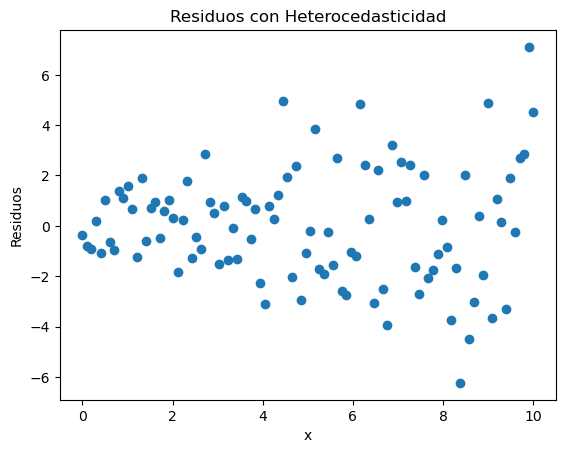

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir heterocedasticidad en los errores
errors = np.random.normal(scale=1, size=100) * np.sqrt(x)

y_heteroscedastic = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_heteroscedastic, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_heteroscedastic - y_pred

# Gráfica de los residuos con heterocedasticidad
#plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, marker='o')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos con Heterocedasticidad')
plt.show()


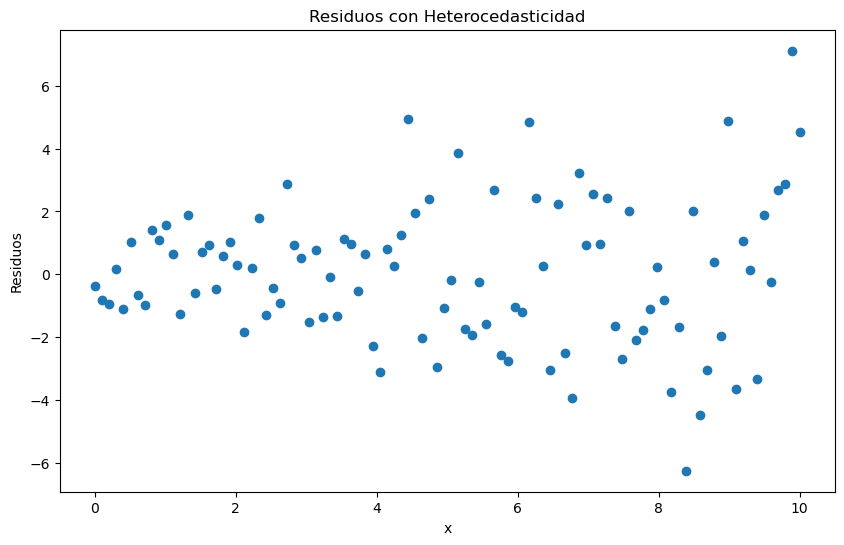

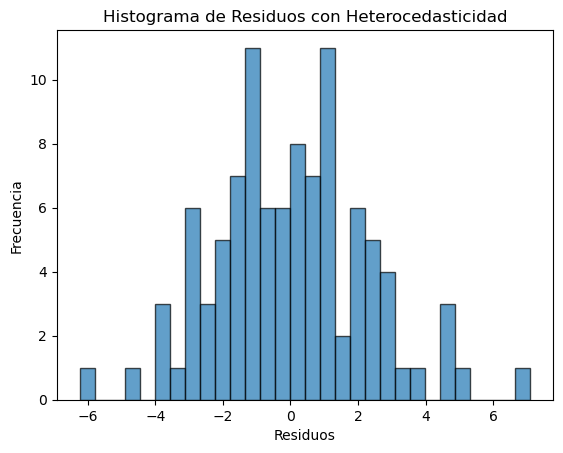

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=1, size=100)

# Introducir heterocedasticidad en los errores
errors = np.random.normal(scale=1, size=100) * np.sqrt(x)

y_heteroscedastic = 2 * x + 1 + errors

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_heteroscedastic, sm.add_constant(x)).fit()
y_pred = model.predict(sm.add_constant(x))
residuals = y_heteroscedastic - y_pred

# Gráfica de los residuos con heterocedasticidad
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, marker='o')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos con Heterocedasticidad')
plt.show()

# Histograma de los residuos
#plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos con Heterocedasticidad')
plt.show()


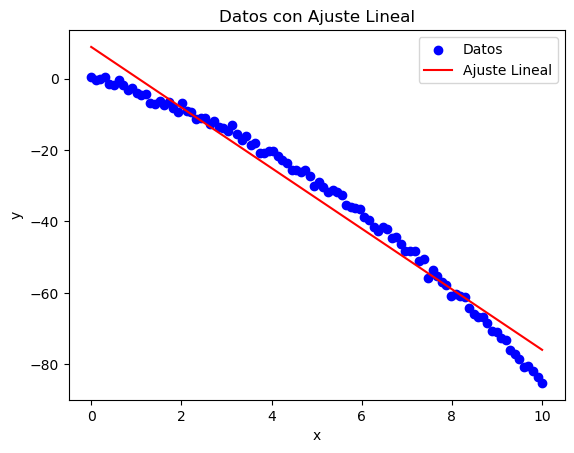

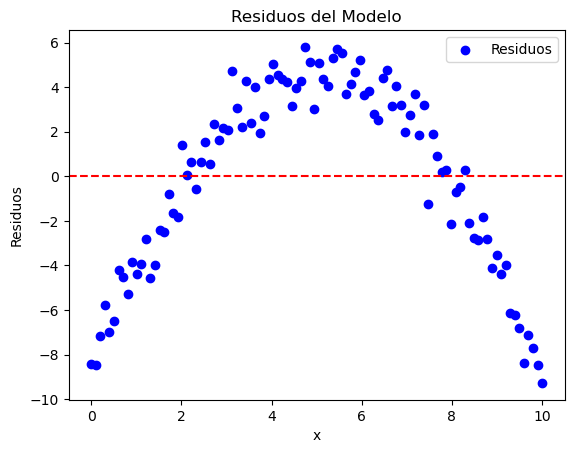

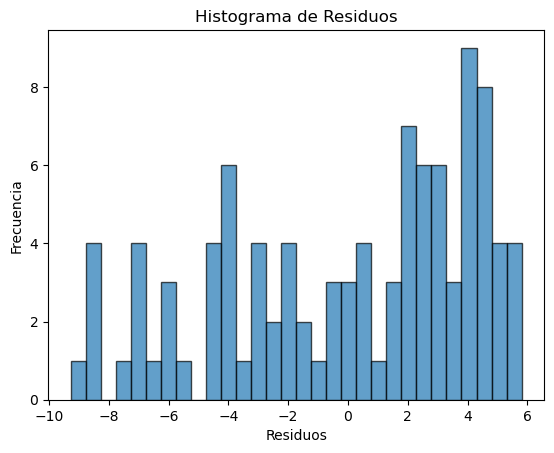

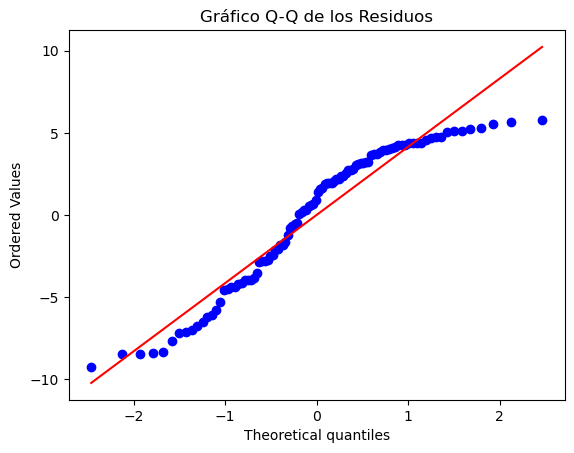

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3364.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.13e-77
Time:                        16:24:10   Log-Likelihood:                -285.95
No. Observations:                 100   AIC:                             575.9
Df Residuals:                      98   BIC:                             581.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9013      0.847     10.511      0.0

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot

# Generar datos
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = -3 * x - 0.55 * (x ** 2) + np.random.normal(scale=1, size=100)

# Ajuste de regresión lineal
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
residuals = y - y_pred

# Gráfica de los datos y la línea de regresión
#plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_pred, label='Ajuste Lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos con Ajuste Lineal')
plt.legend()
plt.show()

# Gráfica de residuos
#plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, label='Residuos', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo')
plt.legend()
plt.show()

# Histograma de residuos
#plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# Gráfico Q-Q
#plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

# Resultados del modelo
print(model.summary())
